# Residential Solver Demo

In this notebook, we'll demo how we can invoke `ResidentialSolver` with different `ElectricVehicle`s or `BatteryStorage`s and visualize the results.

## Load dependencies

In [1]:
from residential_solver import *
import matplotlib.pyplot as plt
import pulp as pl
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 18})

## Ensure we have an available LP solver

Pulp comes with at least one, so we should be good. However, we're going to ensure it's initialized with `msg=False` so we don't get tons of logging output :)

In [3]:
pl.listSolvers(onlyAvailable=True)

['PULP_CBC_CMD']

In [4]:
solver = pl.getSolver('PULP_CBC_CMD', msg=False) # quiet logging messages :)

## Solve some problems!

Let's see what happens when we try to solve for charging schedules of different devices, with different capacities, degradation costs, and initial charges:

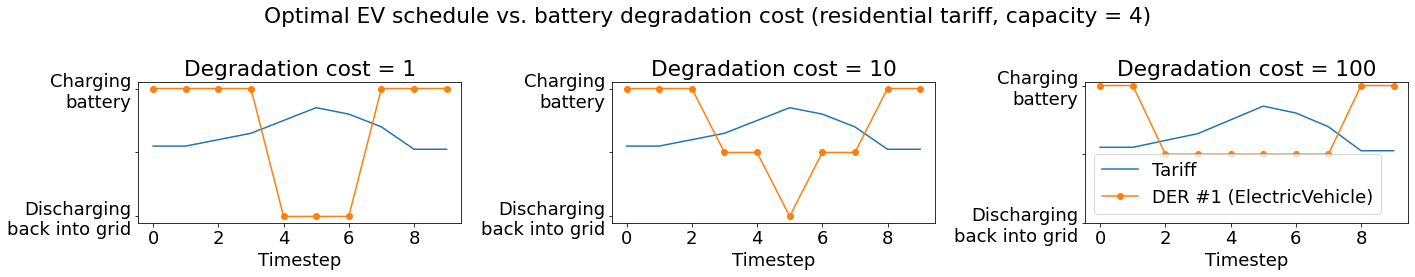

In [5]:
fig = plt.figure(figsize=(20,4))
fig.suptitle("Optimal EV schedule vs. battery degradation cost (residential tariff, capacity = 4)")
for i,cost in enumerate([1, 10, 100],1):
    plt.subplot(1,3,i,title=f"Degradation cost = {cost}")
    ResidentialSolver([
        ElectricVehicle(degradationCost=cost, capacity=4)
    ]).solve(solver=solver).plot_solution()
    plt.xlabel("Timestep")
    if i < 3:
      plt.gca().get_legend().remove()
plt.tight_layout()
plt.show()

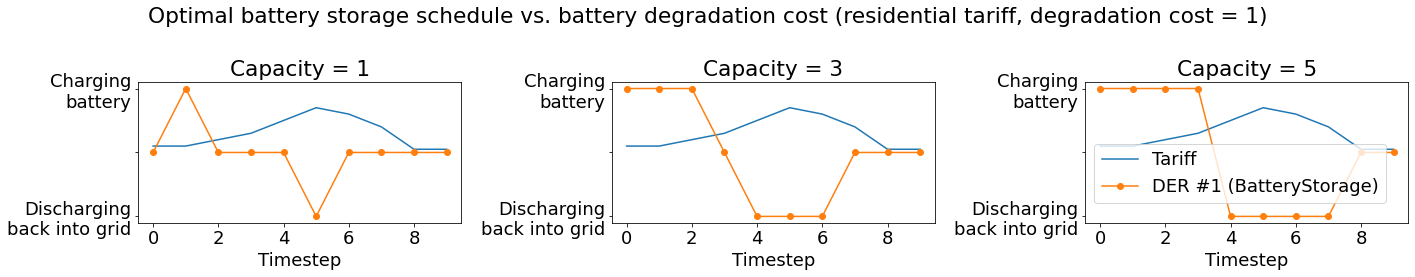

In [6]:
fig = plt.figure(figsize=(20,4))
fig.suptitle("Optimal battery storage schedule vs. battery degradation cost (residential tariff, degradation cost = 1)")
for i,cap in enumerate([1,3,5],1):
    plt.subplot(1,3,i,title=f"Capacity = {cap}")
    ResidentialSolver([
        BatteryStorage(capacity=cap, degradationCost=1)
    ]).solve(solver=solver).plot_solution()
    plt.xlabel("Timestep")
    plt.gca().get_legend().remove()

plt.legend(loc='center left', bbox_to_anchor=(0,-0.15,1,1))
plt.tight_layout()
plt.show()

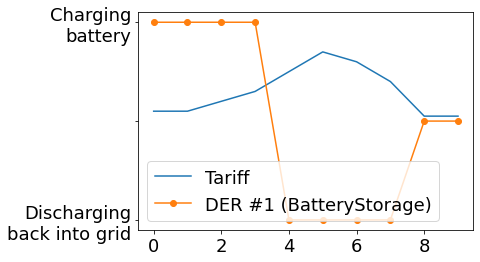

In [7]:
ResidentialSolver([ BatteryStorage() ]).solve(solver=solver).plot_solution()

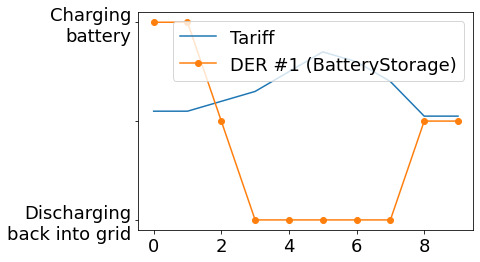

In [8]:
ResidentialSolver([ BatteryStorage(capacity=6, initialCharge=3) ]).solve(solver=solver).plot_solution()

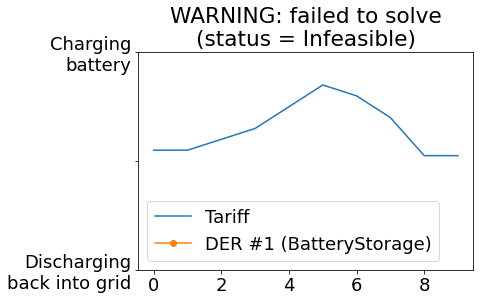

In [9]:
ResidentialSolver([ BatteryStorage(capacity=10, initialCharge=100) ]).solve(solver=solver).plot_solution()

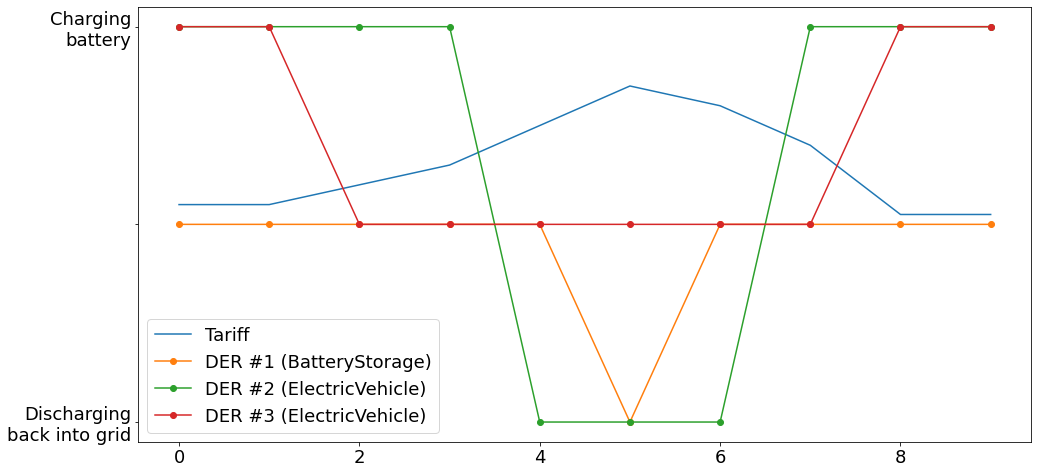

In [10]:
plt.figure(figsize=(16,8))
ResidentialSolver([
    BatteryStorage(capacity=1, initialCharge=1, degradationCost=10),
    ElectricVehicle(capacity=4, initialCharge=0),
    ElectricVehicle(capacity=4, initialCharge=0, degradationCost=100),
]).solve(solver=solver).plot_solution()